In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pycountry
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

## Data Cleaning

In [2]:
df = pd.read_csv("The Global Dataset 3 Sept 2018.csv", low_memory=False)
df = df.drop(df.columns[0], axis=1)

In [5]:
value, count = np.unique(
    df[(df['CountryOfExploitation'] != "-99")
       & (df['CountryOfExploitation'] != 'Y1') &
       (df['CountryOfExploitation'] != 'ZZ')]['CountryOfExploitation'],
    return_counts=True)

In [1]:
def code_to_country(code):
    #for index, row in df.iterrows():
    if code != '-99' and code != 'Y1' and code != 'ZZ':
        country = pycountry.countries.lookup(code).name
        return country
    return "NA"
df['CountryOfExploitation'] = [
    code_to_country(i) for i in df['CountryOfExploitation']
]
value, count = np.unique(df['ageBroad'], return_counts=True)

NameError: name 'df' is not defined

## Bar plot showing distribution of victim count over age

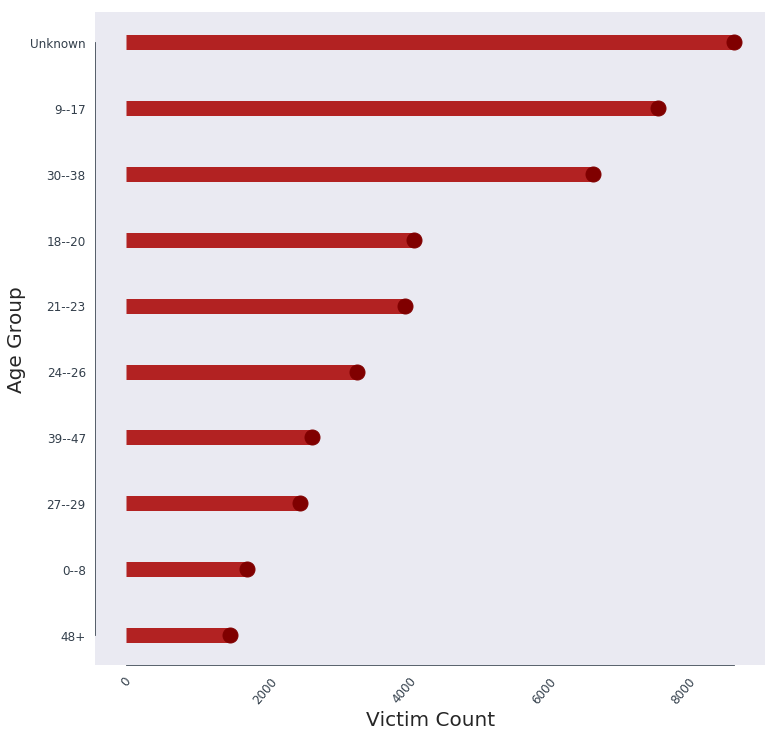

In [35]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
sns.set_palette(sns.color_palette("hls", 15))
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
plt.rcParams['text.color'] = '#333F4B'

percentages = pd.Series(count[1:], index=value[1:])
plot_df = pd.DataFrame({'percentage': percentages})
plot_df = plot_df.sort_values(by='percentage')

my_range = list(range(1, len(plot_df.index) + 1))

fig, ax = plt.subplots(figsize=(12, 12))

plt.hlines(
    y=my_range,
    xmin=0,
    xmax=plot_df['percentage'],
    color='firebrick',
    alpha=1,
    linewidth=15)

plt.plot(
    plot_df['percentage'],
    my_range,
    "o",
    markersize=15,
    color='maroon',
    alpha=1)

ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, plot_df.index)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Victim Count', fontsize=20)
plt.xticks(rotation=50)
ax.set_ylabel('Age Group', fontsize=20)
plt.grid(b=None)
plt.savefig(
    'age_group_ctdc.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

## Observations:
- Young people below the age of 18 are most targeted
- Intimate partners and people acting as friends are the ones likely to traffic people

## Plot Showing Gender Age distribution over years

In [19]:
boys_df = df[(df['majorityStatus'] == 'Minor')
             & (df['gender'] == 'Male')].dropna()
girls_df = df[(df['majorityStatus'] == 'Minor')
              & (df['gender'] == 'Female')].dropna()
men_df = df[(df['majorityStatus'] == 'Adult')
            & (df['gender'] == 'Male')].dropna()
women_df = df[(df['majorityStatus'] == 'Adult')
              & (df['gender'] == 'Female')].dropna()
value_boy, boy_count = np.unique(
    boys_df['yearOfRegistration'], return_counts=True)
value_girl, girl_count = np.unique(
    girls_df['yearOfRegistration'], return_counts=True)
value_men, men_count = np.unique(
    men_df['yearOfRegistration'], return_counts=True)
value_women, women_count = np.unique(
    women_df['yearOfRegistration'], return_counts=True)

/home/neeraj/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


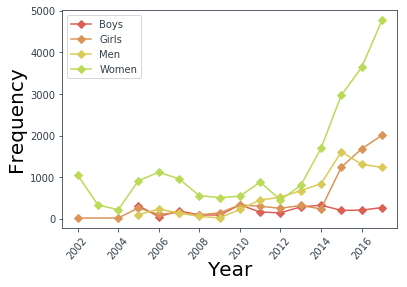

In [20]:
plt.plot(value_boy[:-1], boy_count[:-1], "-D", label="Boys")
plt.plot(value_girl[:-1], girl_count[:-1], "-D", label="Girls")
plt.plot(value_men[:-1], men_count[:-1], "-D", label="Men")
plt.plot(value_women[:-1], women_count[:-1], "-D", label="Women")
plt.xlabel('Year', fontsize=20, labelpad=0)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=50)
plt.legend(loc="best")
plt.savefig(
    'hist3.svg', format='svg', dpi=1000, bbox_inches='tight', transparent=True)
plt.show()

### Observations
- Total no. of victims has doubled, but no. of men victims declined in 2018 as compared to 2016
- Women and girls trafficking increased by many folds.


## Pie showing distribution of crime

['ForcedLabour', 'SexualExploit', 'OtherExploit', 'SexAndLabour', 'ForcedMarriage', 'ForcedMilitary', 'OrganRemoval'] [20358, 9122, 29075, 27696, 11533, 12019, 12019]


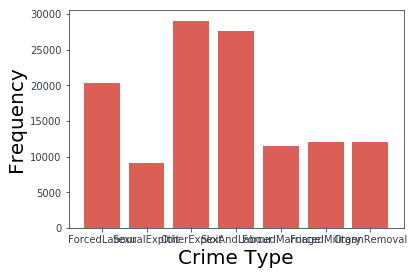

In [26]:
value = []
count = []
for r in [
        'isForcedLabour', 'isSexualExploit', 'isOtherExploit',
        'isSexAndLabour', 'isForcedMarriage', 'isForcedMilitary',
        'isOrganRemoval'
]:
    value.append(r.split("is")[1])
    c, v = np.unique(df[r], return_counts=True)
    count.append(v[1])
ax = plt.subplot(1, 1, 1)
ax.figure
ax.bar(value, count)
ax.set_xlabel("Crime Type", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
plt.savefig(
    'hist5.svg', format='svg', dpi=1000, bbox_inches='tight', transparent=True)
print(value, count)

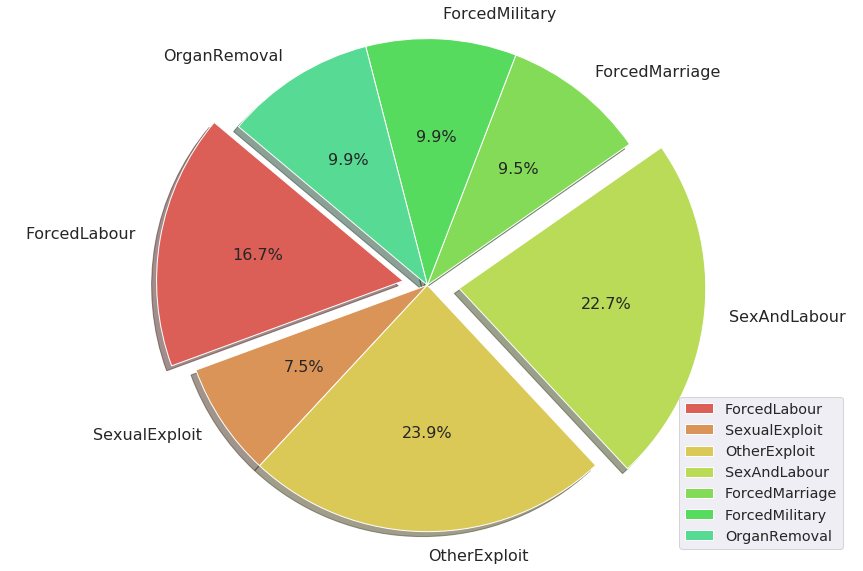

In [28]:
labels = value
sizes = count
explode = [0] * len(sizes)
explode[0] = 0.1
explode[3] = 0.13
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 16})
sns.set()
sns.set_palette(sns.color_palette("hls", 15))
plt.axis('equal')
plt.legend(loc="lower right", fontsize='large')
plt.rcParams["figure.figsize"] = (15, 10)
plt.savefig(
    'crime_type_ctdc.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

### Observations:
- Young victims  are usually trafficked and are forced into child labour and sex/prostitution
- About 50% of the cases are related to the above categories
- Forced Military takes up about 10% of the victims


## Pie showing relationship of victim with the accused

['IntimatePartner', 'Friend', 'Family', 'Other', 'Unknown'] [40642, 40748, 40639, 37874, 45857]


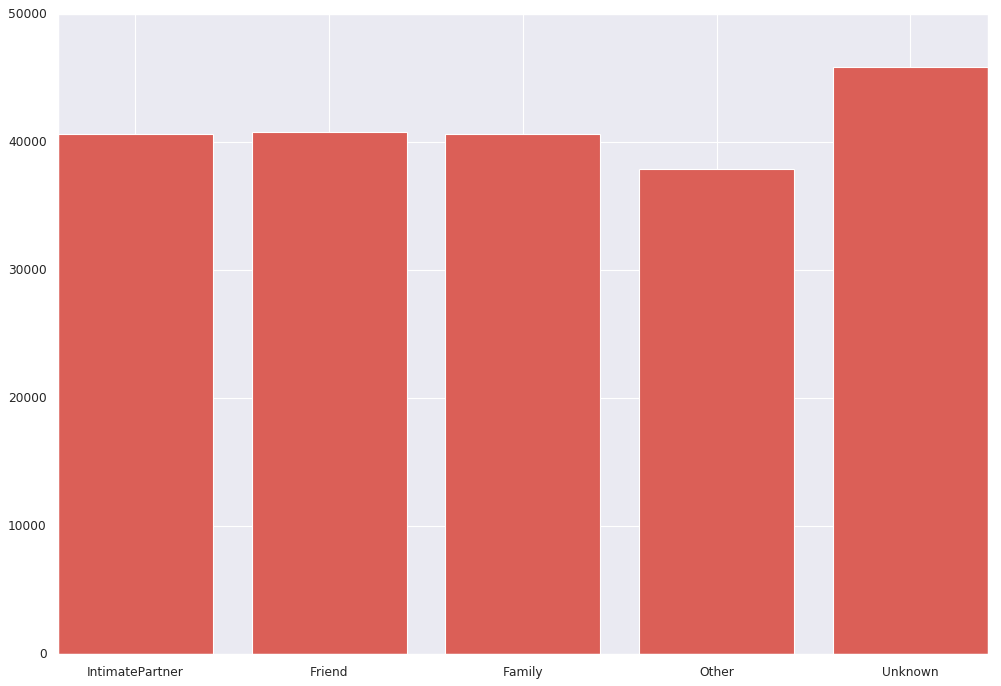

In [66]:
value = []
count = []
for r in [
        'recruiterRelationIntimatePartner', 'recruiterRelationFriend',
        'recruiterRelationFamily', 'recruiterRelationOther',
        'recruiterRelationUnknown'
]:
    value.append(r.split("recruiterRelation")[1])
    c, v = np.unique(df[r], return_counts=True)
    count.append(v[1])
plt.bar(value, count)
print(value, count)

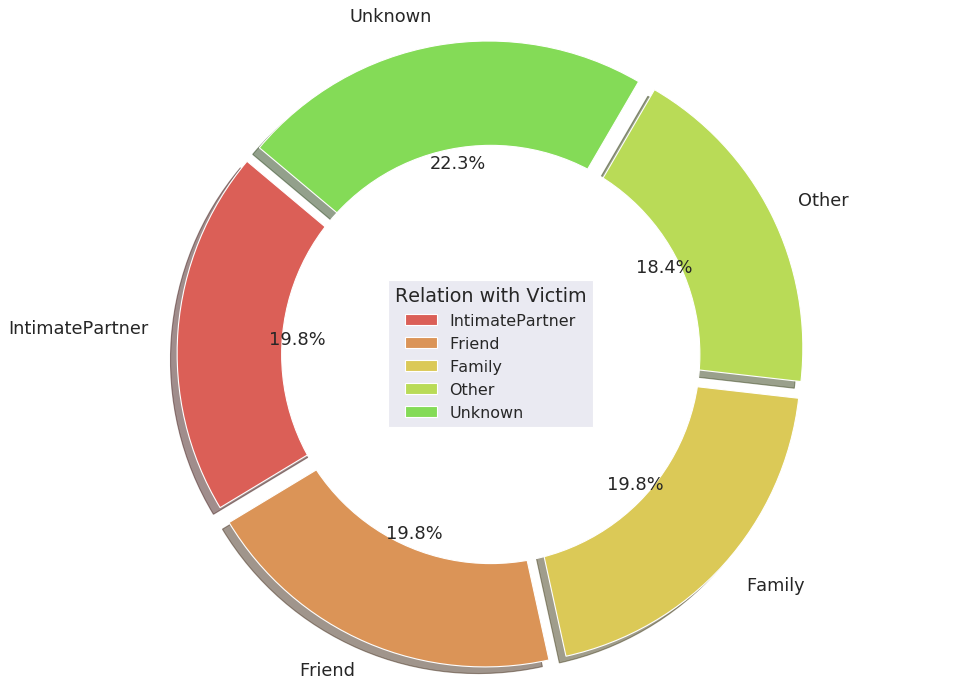

In [33]:
labels = value
sizes = count
explode = [0.05] * len(sizes)
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 16})
sns.set()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
sns.set_palette(sns.color_palette("hls", 15))
plt.axis('equal')
plt.legend(
    loc="center",
    fontsize='large',
    title='Relation with Victim',
    title_fontsize='x-large')
plt.rcParams["figure.figsize"] = (15, 10)
plt.savefig(
    'relation_ctdc.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

## Observations:
- Intimate partners and people acting as friends are the ones likely to traffic people
- More than in 60% cases the accused is closely realted to the victim